<a href="https://colab.research.google.com/github/DallasAutumn/datawhale_salons/blob/master/PyTorch_s8_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch-s8-task5 L1，L2正则化及Dropout实现

## 1. Dropout原理

Dropout（随机失活）是防止过拟合的一种方法。在训练过程中，随机失活可以认为是抽样出了一些子网络（当然是不独立的），因为他们共享参数；测试过程中，所有的神经元都激活，可看作是对子网络进行了模型集成（ensemble）。

## 2. L1、L2和正则化的实现

In [0]:
# L1正则化只能手动实现
regularization_loss = 0
for param in model.parameters():
    regularization_loss += torch.sum(abs(param))

calssify_loss = criterion(pred,target)
loss = classify_loss + lamda * regularization_loss

optimizer.zero_grad()
loss.backward()
optimizer.step()

# L2正则化可以直接在优化器中的weight_decay参数设置

In [0]:
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

%matplotlib inline

x.size() torch.Size([20, 1])


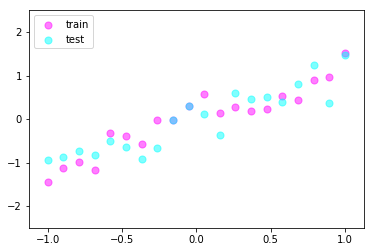

In [5]:
torch.manual_seed(1)    # Sets the seed for generating random numbers.reproducible

N_SAMPLES = 20
N_HIDDEN = 300

# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
print('x.size()',x.size())

# torch.normal(mean, std, out=None) → Tensor
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [0]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1),
)

net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.Dropout(0.5), # 0.5的概率失活
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1),
)


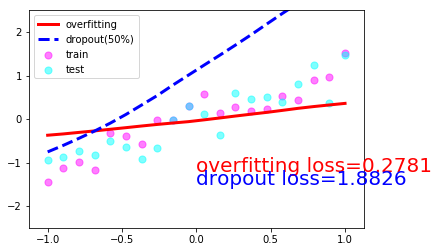

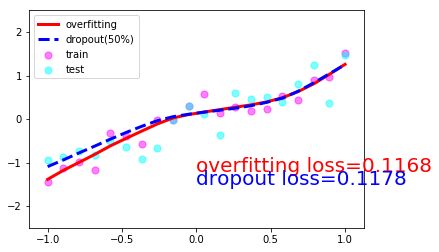

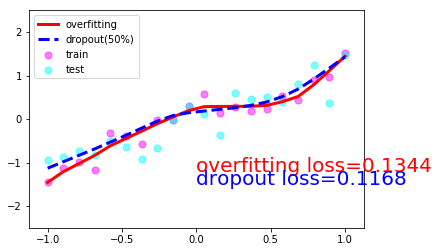

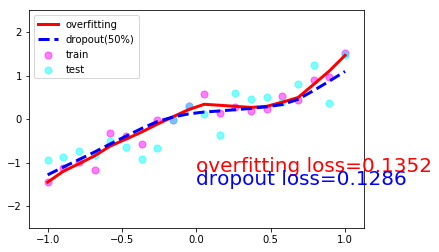

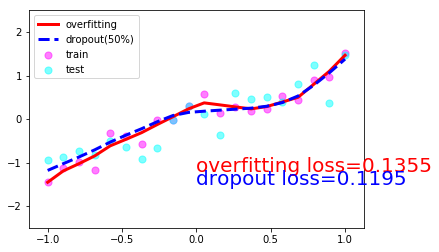

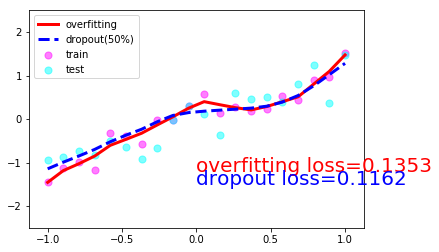

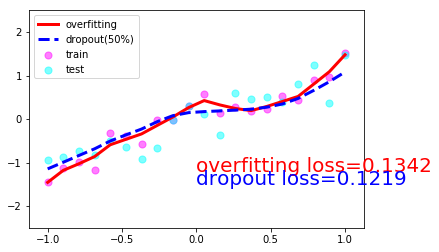

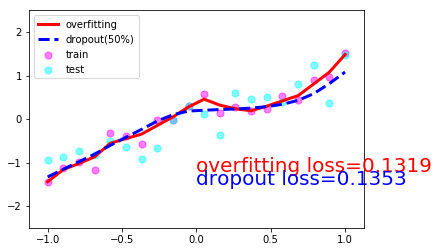

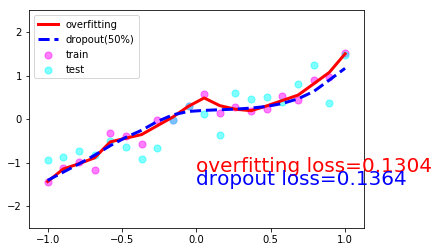

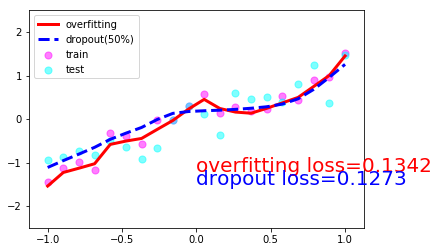

In [7]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(),lr=0.001)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(),lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(500):
    pred_ofit= net_overfitting(x)
    pred_drop= net_dropped(x)

    loss_ofit = loss(pred_ofit,y)
    loss_drop = loss(pred_drop,y)

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()

    loss_ofit.backward()
    loss_drop.backward()

    optimizer_ofit.step()
    optimizer_drop.step()

    if epoch%50 ==0 :
        net_overfitting.eval() # 将神经网络转换成测试形式,此时不会对神经网络dropout
        net_dropped.eval() # 此时不会对神经网络dropout

        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)

        # show data
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss(test_pred_ofit, test_y).data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss(test_pred_drop, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)


        net_overfitting.train()
        net_dropped.train()

plt.ioff()
plt.show()